In [1]:
import os

import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
from matplotlib import rcParams
from cycler import cycler

from utils import *
from plot_utils import *
from AnalyseDefects import AnalyseDefects

## Set plotting style and print options
sns.set_theme()
sns.set_style("darkgrid")
sns.set_context("paper") #Possible are paper, notebook, talk and poster

d = {'lines.linewidth': 2, 'axes.titlesize': 20, 'axes.titleweight': 'bold', 'axes.labelsize': 18, 'xtick.labelsize': 12, 'axes.labelweight': 'bold', 'ytick.labelsize': 12,\
     'legend.fontsize': 15, 'font.family': 'serif', 'font.weight': 'bold', 'figure.titlesize': 20,'figure.titleweight': 'bold',\
          'figure.labelsize': 18,'figure.labelweight': 'bold', 'figure.figsize': (9,6), }
d_colors = {'axes.prop_cycle': cycler(color = ['teal', 'navy', 'coral', 'plum', 'purple', 'olivedrab',\
         'black', 'red', 'cyan', 'brown', 'green', 'yellow', 'khaki','lightblue', 'firebrick', 'darkorange', 'darkviolet', 'darkgoldenrod', 'darkslategray', 'darkturquoise',\
             'darkmagenta', 'darkkhaki', 'darkolivegreen', 'darkseagreen', 'darkslateblue', 'darkslategrey', 'darkorchid', 'darkcyan', 'darkred', 'darkgray', 'darkgreen'])}
rcParams.update(d)
rcParams.update(d_colors)
np.set_printoptions(precision = 5, suppress=1e-10)

In [ ]:
LX = [256, 512, 1024, 2048]
prefix = ""
for L in LX:
    path = f'C:\\Users\\Simon Andersen\\Documents\\Uni\\Speciale\\Hyperuniformity\\nematic_analysis{L}_LL0.05{prefix}_sfac'
    if os.path.isdir(path):
        print(L)
        move_files(path)

In [2]:
LL = 1024
mode = 'all'
output_path = f'data\\nematic_analysis{LL}_LL0.05'

dshort = dict(path = f'C:\\Users\\Simon Andersen\\Documents\\Uni\\Speciale\\Hyperuniformity\\nematic_analysis{LL}_LL0.05', \
              suffix = "short", priority = -1, LX = LL, Nframes = 181)
dlong = dict(path = f'C:\\Users\\Simon Andersen\\Documents\\Uni\\Speciale\\Hyperuniformity\\nematic_analysis{LL}_LL0.05_long', \
             suffix = "long", priority = 0, LX = LL, Nframes = 400)
dvery_long = dict(path = f'C:\\Users\\Simon Andersen\\Documents\\Uni\\Speciale\\Hyperuniformity\\nematic_analysis{LL}_LL0.05_very_long',\
                   suffix = "very_long", priority = 3, LX = LL, Nframes = 1500)
dvery_long2 = dict(path = f'C:\\Users\\Simon Andersen\\Documents\\Uni\\Speciale\\Hyperuniformity\\nematic_analysis{LL}_LL0.05_very_long_v2',\
                   suffix = "very_long2", priority = 2, LX = LL, Nframes = 1500)

if mode == 'all':
    if LL == 2048:
        defect_list = [dshort, dlong]
    else:
        defect_list = [dshort, dlong, dvery_long, dvery_long2] if LL in [256, 512] else [dshort, dlong, dvery_long]
else:
    defect_list = [dshort]

def log_func(x, a, b, c):
    return a * np.log(x) + b*x + c
fit_string = rf'$y = a \ln x + bx + c $'
fit_dict = dict(fit_func = log_func, fit_string = fit_string, lower_act_index = 12, param_guess = np.array([0.005, 0.04,0.015]))

ad = AnalyseDefects(defect_list, output_path=output_path)


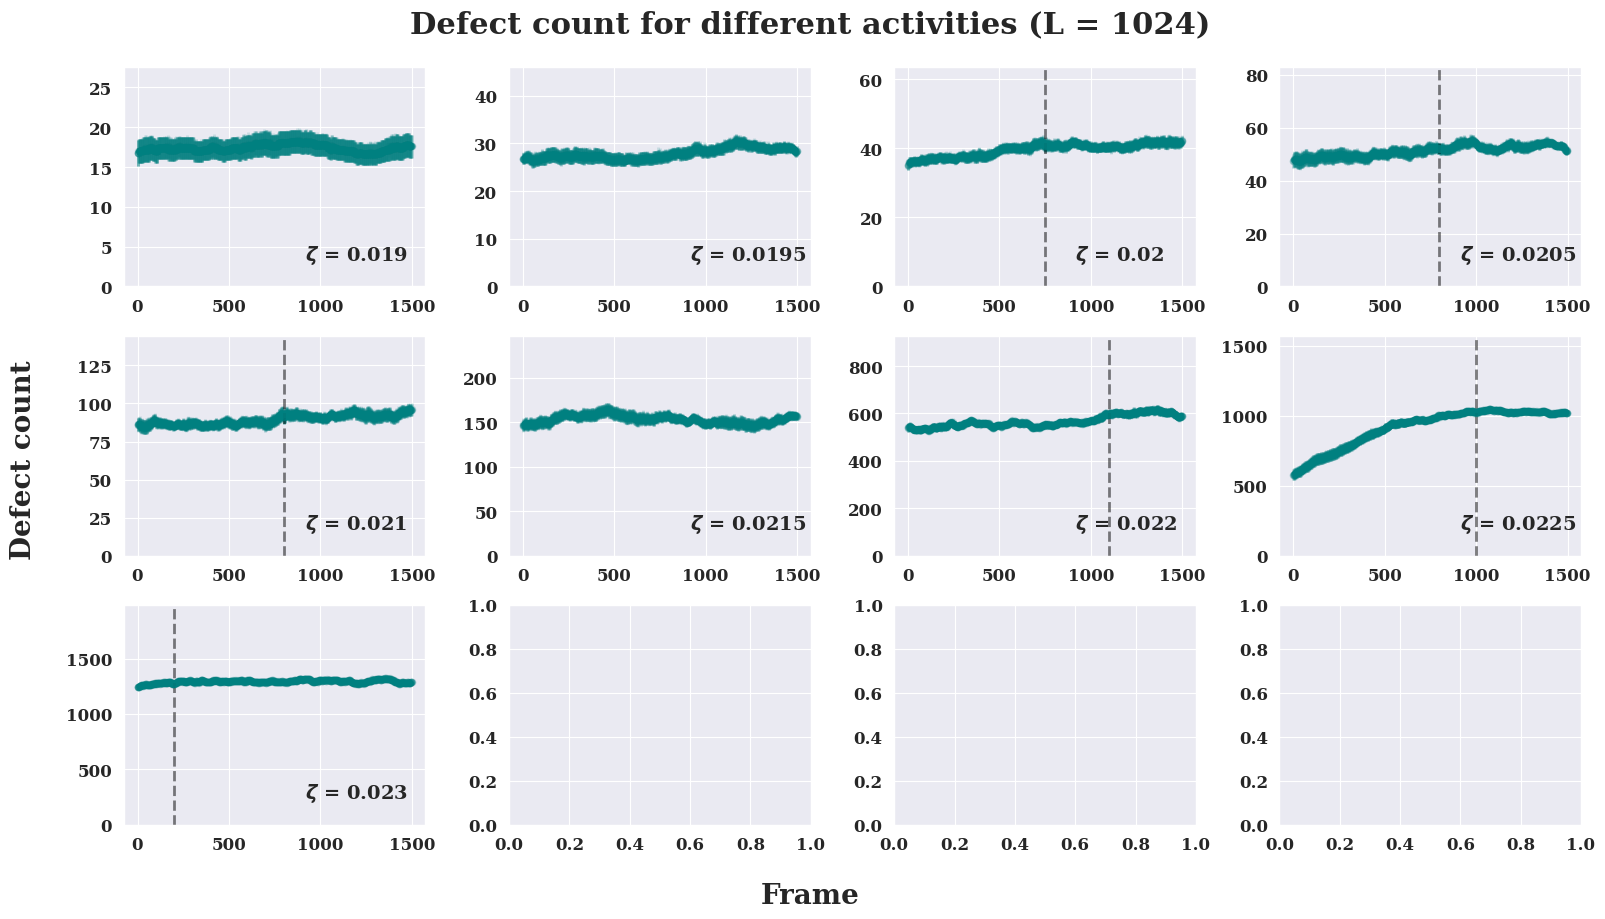

(<Figure size 1600x900 with 12 Axes>,
 array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
        <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >],
       dtype=object))

In [55]:
ad.plot_defects_per_activity(Ndataset=2)

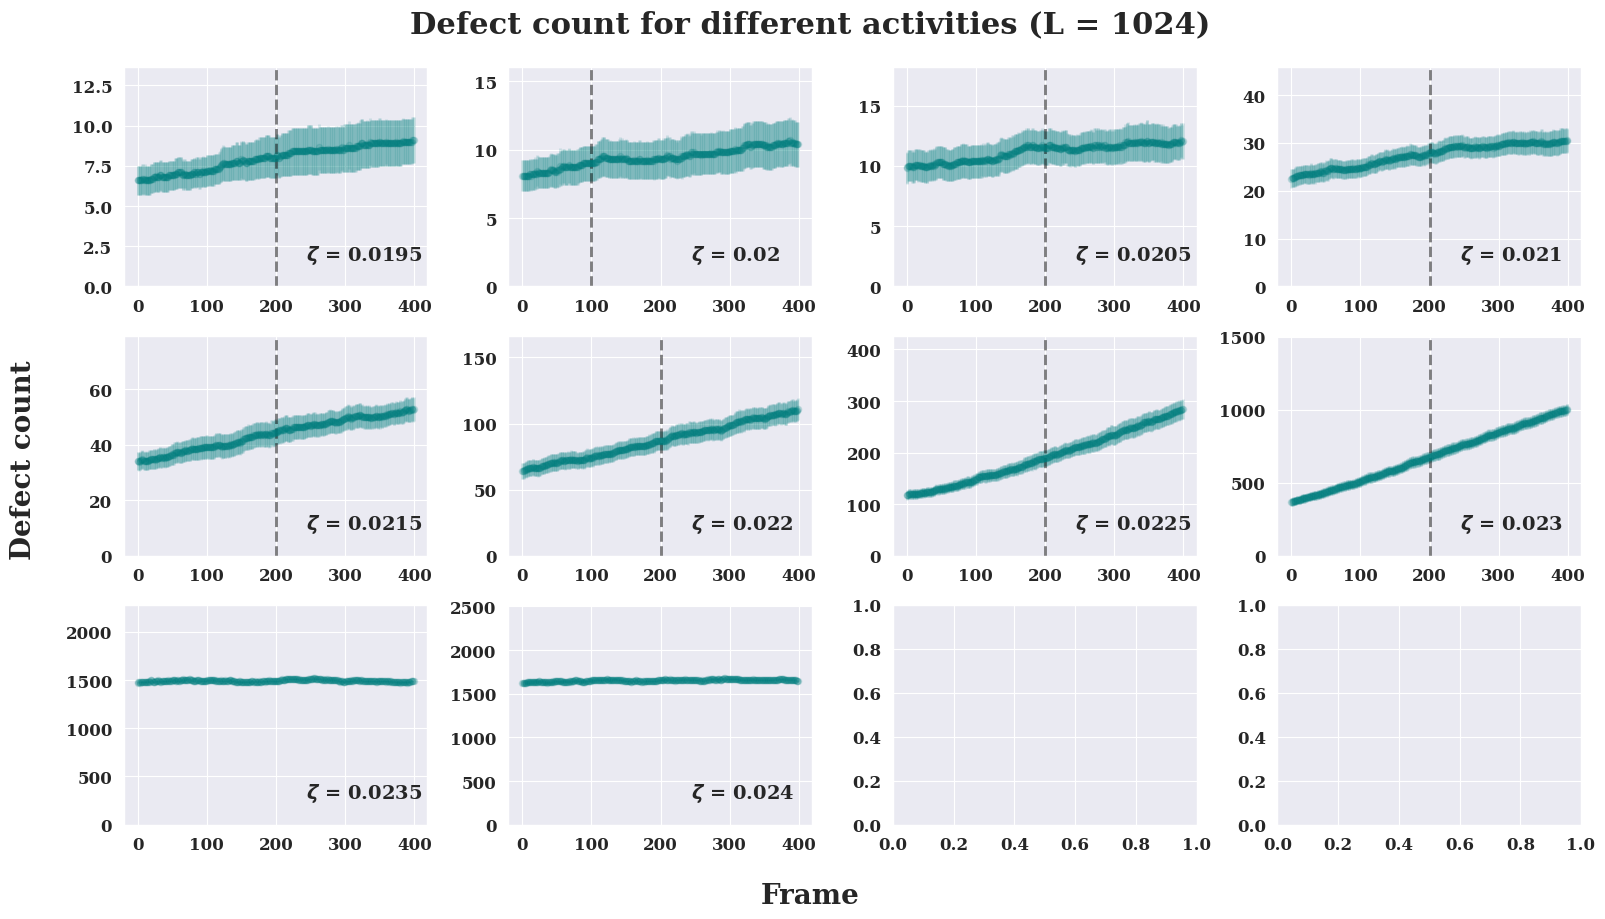

(<Figure size 1600x900 with 12 Axes>,
 array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
        <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >],
       dtype=object))

In [137]:
ad.plot_defects_per_activity(Ndataset=1)

In [3]:
# Extract, analyze and merge results
ad.extract_results()
ad.analyze_defects()
ad.merge_results()

Analyse defects for input folder C:\Users\Simon Andersen\Documents\Uni\Speciale\Hyperuniformity\nematic_analysis1024_LL0.05
Analyse defects for input folder C:\Users\Simon Andersen\Documents\Uni\Speciale\Hyperuniformity\nematic_analysis1024_LL0.05_long
Analyse defects for input folder C:\Users\Simon Andersen\Documents\Uni\Speciale\Hyperuniformity\nematic_analysis1024_LL0.05_very_long
NB: All simulations are set to converge at the first frame for dataset 0. To change this, call update_conv_list.



In [3]:
Bs, Xs = ad.get_binder_susceptibility(use_merged = True)
acts = ad.act_list[0]

In [5]:
Bn, Xn = ad.get_binder_susceptibility(use_merged = True)
acts = ad.act_list[0]

In [10]:
def_arr.shape, def_arr_av.shape

((1500, 9, 20), (1500, 9))

In [196]:
# deff arrs: dens, dens norm [per frame + tot], 
# order ps: clean, shifted by mean, area 
# sus via dens fluc or 2 kinds of var
# full vs tav
N = 2

def_arr, _, dens_fluc_full, av_counts = ad.get_arrays_full(Ndataset = N)
av_def = ad.get_arrays_av(Ndataset = N)[-1]
def_arr_av = ad.get_arrays_av(Ndataset = N)[0]
dens_fluc = dens_fluc_full * (def_arr[:, None, :, :] / LL ** 2) ** 2

act_list = ad.act_list[N]
conv_list = ad.conv_list[N]

#conv_list = [1100] * len(conv_list)

def_arr /= LL ** 2
def_arr_av /= LL ** 2
av_def /= LL ** 2

def_arr_normf = def_arr / def_arr_av [:, :, None]
def_arr_normt = def_arr / av_def[:,0][None, :, None]

#def_arr_shiftf = (def_arr - def_arr_av[:, :, None]) / def_arr_av [:, :, None]
#def_arr_shiftt = (def_arr - av_def[:,0][None, :, None]) / av_def[:,0][None, :, None]

dens_fluc = dens_fluc /  av_def[:,0][None, None, :, None] ** 2
av_counts = av_counts / LL ** 2
av_counts = av_counts #/ av_def[:,0][None, None, :, None]

wmin = 0
fmin = 0
sus_ft = np.nanmean(dens_fluc[fmin:,wmin:,:,:], axis = (0, 1, -1))
sus_ft *= av_def[:,0][:] * LL ** 2
binder_ft = np.nanmean(av_counts[fmin:,wmin:,:,:], axis = (0, 1, -1)) ** 4 \
            / np.nanmean(av_counts[fmin:,wmin:,:,:] ** 2, axis = (0, 1, -1)) ** 2 

binder_ft = 1 - binder_ft/3

A = np.pi * 1.25 ** 2
scaling = 1
rho_max = 0.01
Nmax = rho_max * LL ** 2
def_arr_a = (scaling * 2  * A * def_arr * LL ** 2 - LL ** 2) / (LL ** 2)
def_arr_n = (2 * def_arr * LL ** 2 - Nmax) / (Nmax)
def_arr_rho = (scaling * 2  * def_arr - rho_max) / (rho_max)

In [175]:
av_counts.shape

(1500, 30, 9, 20)

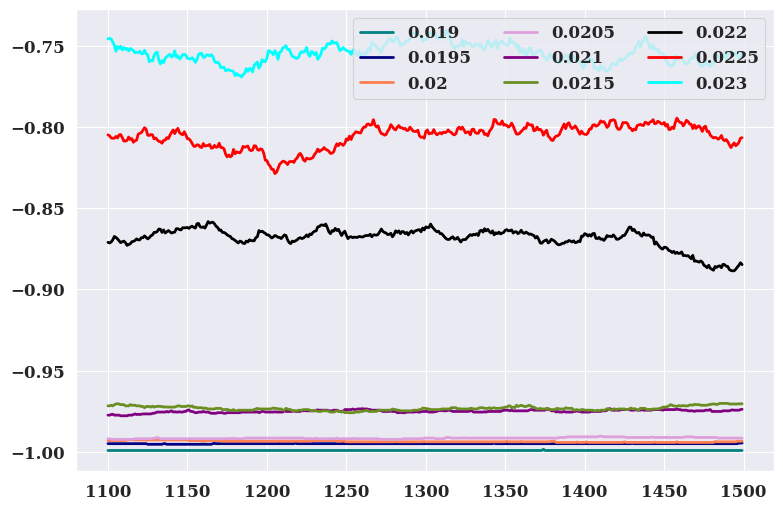

In [132]:
for i, act in enumerate(act_list):
    plt.plot(np.arange(conv_list[i], def_arr_rho.shape[0]), def_arr_rho[conv_list[i]:,i, 0], label = f'{act}')
plt.legend(fontsize=12, ncol=3)

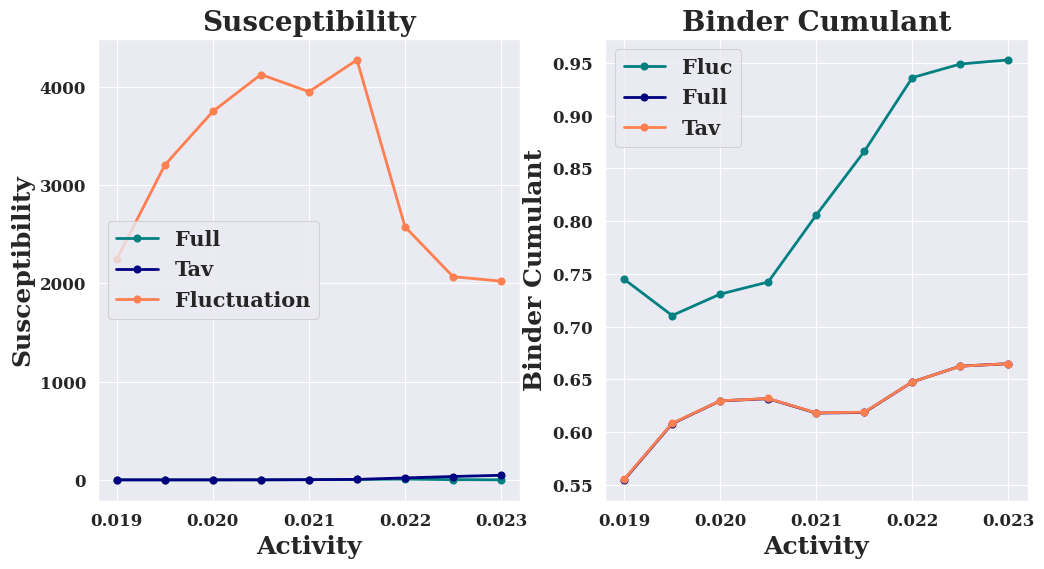

In [197]:
susfull, sus_tav, binder_full, binder_tav = comp_order(def_arr_normf, av_def, act_list, conv_list, LL)
fig, ax = plt.subplots(1, 2, figsize = (12, 6))
ax[0].plot(act_list, susfull, label = 'Full', marker = 'o')
ax[0].plot(act_list, sus_tav, label = 'Tav', marker = 'o')
ax[0].plot(act_list, sus_ft, label = 'Fluctuation', marker = 'o')
ax[1].plot(act_list,  binder_ft, label = 'Fluc', marker = 'o')
ax[0].set_xlabel('Activity')
ax[0].set_ylabel('Susceptibility')
ax[0].set_title('Susceptibility')
ax[0].legend()

ax[1].plot(act_list, binder_full, label = 'Full', marker = 'o')
ax[1].plot(act_list, binder_tav, label = 'Tav', marker = 'o')
ax[1].set_xlabel('Activity')
ax[1].set_ylabel('Binder Cumulant')
ax[1].set_title('Binder Cumulant')
ax[1].legend()

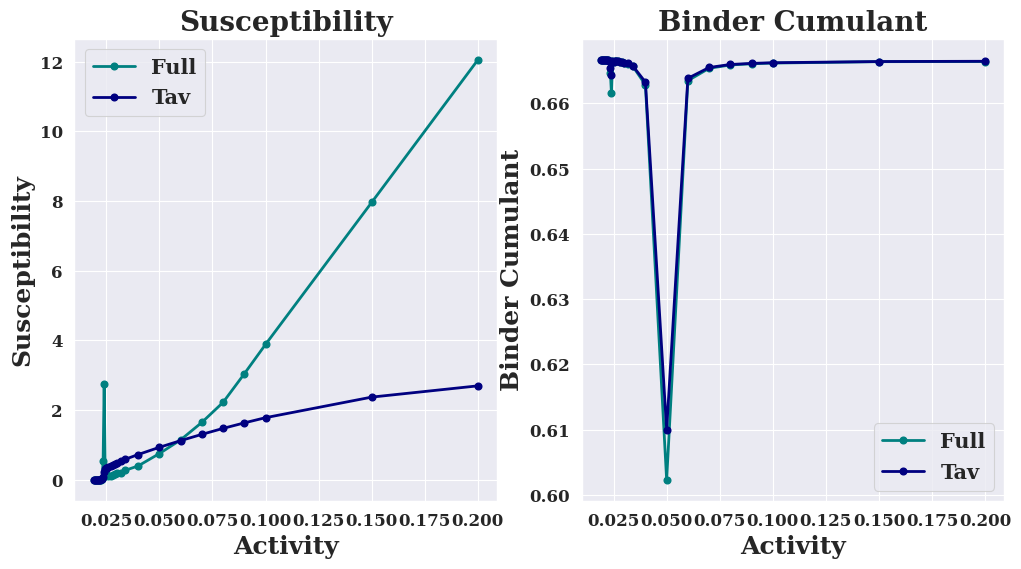

In [140]:
susfull, sus_tav, binder_full, binder_tav = comp_order(def_arr_rho, av_def, act_list, conv_list, LL)
fig, ax = plt.subplots(1, 2, figsize = (12, 6))
ax[0].plot(act_list, susfull, label = 'Full', marker = 'o')
ax[0].plot(act_list, sus_tav, label = 'Tav', marker = 'o')
ax[0].set_xlabel('Activity')
ax[0].set_ylabel('Susceptibility')
ax[0].set_title('Susceptibility')
ax[0].legend()

ax[1].plot(act_list, binder_full, label = 'Full', marker = 'o')
ax[1].plot(act_list, binder_tav, label = 'Tav', marker = 'o')
ax[1].set_xlabel('Activity')
ax[1].set_ylabel('Binder Cumulant')
ax[1].set_title('Binder Cumulant')
ax[1].legend()

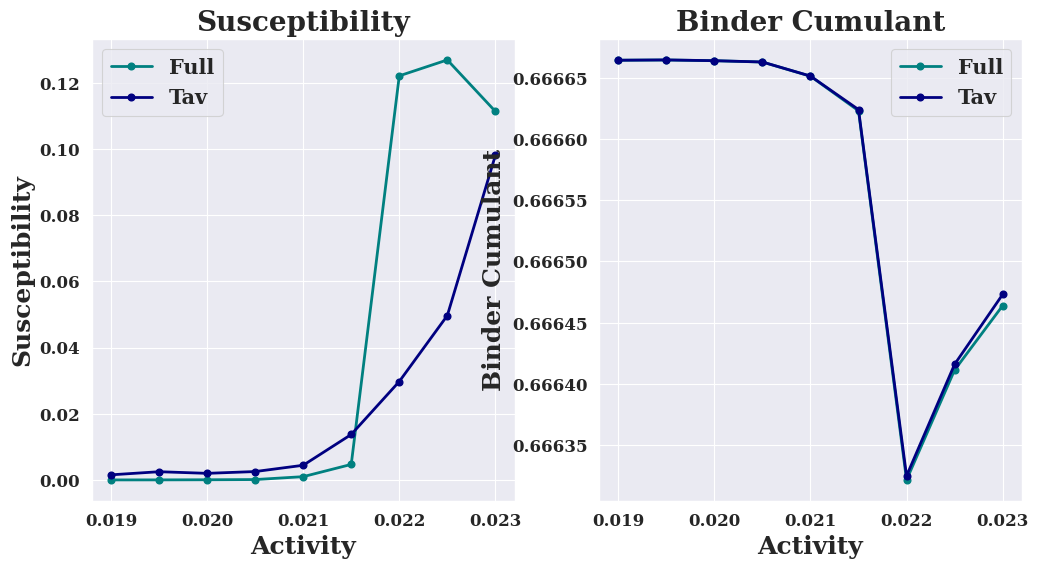

In [183]:
susfull, sus_tav, binder_full, binder_tav = comp_order(def_arr_n, av_def, act_list, conv_list, LL)
fig, ax = plt.subplots(1, 2, figsize = (12, 6))
ax[0].plot(act_list, susfull, label = 'Full', marker = 'o')
ax[0].plot(act_list, sus_tav, label = 'Tav', marker = 'o')
ax[0].set_xlabel('Activity')
ax[0].set_ylabel('Susceptibility')
ax[0].set_title('Susceptibility')
ax[0].legend()

ax[1].plot(act_list, binder_full, label = 'Full', marker = 'o')
ax[1].plot(act_list, binder_tav, label = 'Tav', marker = 'o')
ax[1].set_xlabel('Activity')
ax[1].set_ylabel('Binder Cumulant')
ax[1].set_title('Binder Cumulant')
ax[1].legend()

In [124]:
def comp_order(def_arr, av_def, act_list, conv_list, LL):

    #  sus = np.nanmean((def_arr - av_def[:,0][None,:,None])**2, axis = -1)
    # sus_tav = av_def[:,0] * norm * np.nanmean(sus, axis = 0)

    
    binder = np.nanmean((def_arr)**4, axis = -1) \
            / (3 * np.nanmean((def_arr)**2, axis = -1) ** 2)
    sus = np.nanmean(def_arr ** 2, axis = -1) - np.nanmean(def_arr, axis = -1) ** 2


    sus_full = np.zeros(len(act_list)) * np.nan
    sus_tav = np.nan * np.zeros(len(act_list))

    binder_full = np.zeros(len(act_list)) * np.nan
    binder_tav = np.nan * np.zeros(len(act_list))

    for i, act in enumerate(act_list):
        sus_tav[i] = np.nanmean(sus[conv_list[i]:]) * av_def[i,0] * LL ** 2
        sus_full[i] = np.nanmean(def_arr[conv_list[i]:, i, :] ** 2) - np.nanmean(def_arr[conv_list[i]:, i, :]) ** 2

        binder_full[i] = np.nanmean((def_arr[conv_list[i]:, i, :])**4) \
            / (3 * np.nanmean((def_arr[conv_list[i]:, i, :])**2) ** 2)
        binder_tav[i] = np.nanmean(binder[conv_list[i]:, i])

    binder_tav = 1 - binder_tav
    binder_full = 1 - binder_full
    sus_full[:] *= av_def[:, 0] * LL ** 2

    return sus_full, sus_tav, binder_full, binder_tav

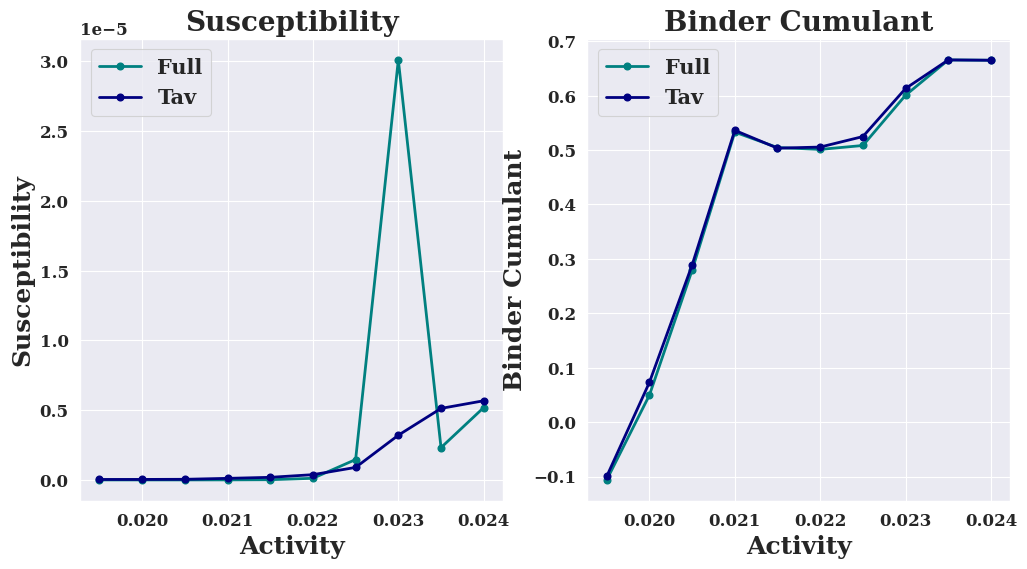

In [147]:
susfull, sus_tav, binder_full, binder_tav = comp_order(def_arr, av_def, act_list, conv_list, LL)
fig, ax = plt.subplots(1, 2, figsize = (12, 6))
ax[0].plot(act_list, susfull, label = 'Full', marker = 'o')
ax[0].plot(act_list, sus_tav, label = 'Tav', marker = 'o')
ax[0].set_xlabel('Activity')
ax[0].set_ylabel('Susceptibility')
ax[0].set_title('Susceptibility')
ax[0].legend()

ax[1].plot(act_list, binder_full, label = 'Full', marker = 'o')
ax[1].plot(act_list, binder_tav, label = 'Tav', marker = 'o')
ax[1].set_xlabel('Activity')
ax[1].set_ylabel('Binder Cumulant')
ax[1].set_title('Binder Cumulant')
ax[1].legend()

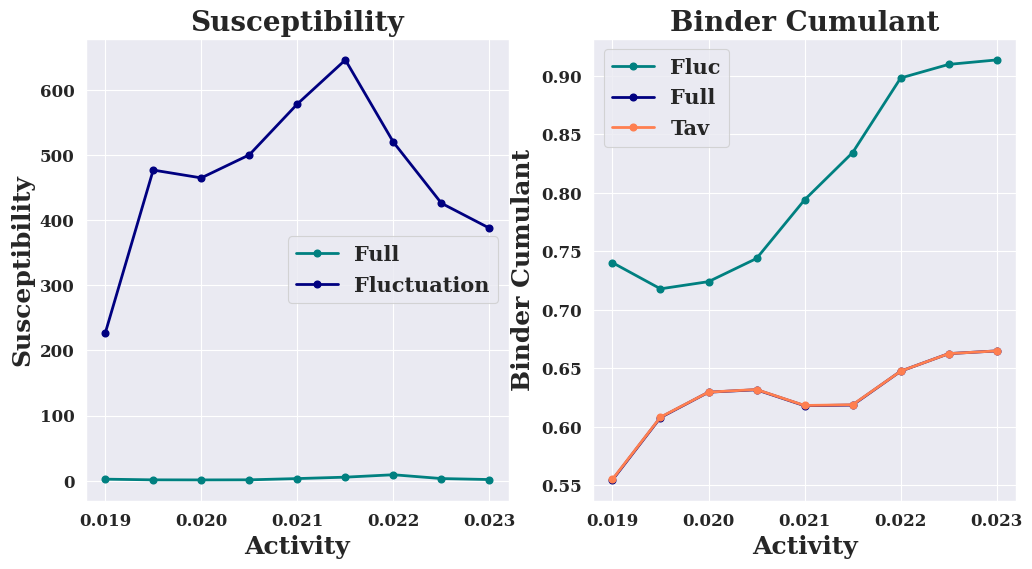

In [184]:
susfull, sus_tav, binder_full, binder_tav = comp_order(def_arr_normf, av_def, act_list, conv_list, LL)
fig, ax = plt.subplots(1, 2, figsize = (12, 6))
ax[0].plot(act_list, susfull, label = 'Full', marker = 'o')
#ax[0].plot(act_list, sus_tav, label = 'Tav', marker = 'o')
ax[0].plot(act_list, sus_ft, label = 'Fluctuation', marker = 'o')
ax[1].plot(act_list, binder_ft, label = 'Fluc', marker = 'o')
ax[0].set_xlabel('Activity')
ax[0].set_ylabel('Susceptibility')
ax[0].set_title('Susceptibility')
ax[0].legend()

ax[1].plot(act_list, binder_full, label = 'Full', marker = 'o')
ax[1].plot(act_list, binder_tav, label = 'Tav', marker = 'o')
ax[1].set_xlabel('Activity')
ax[1].set_ylabel('Binder Cumulant')
ax[1].set_title('Binder Cumulant')
ax[1].legend()

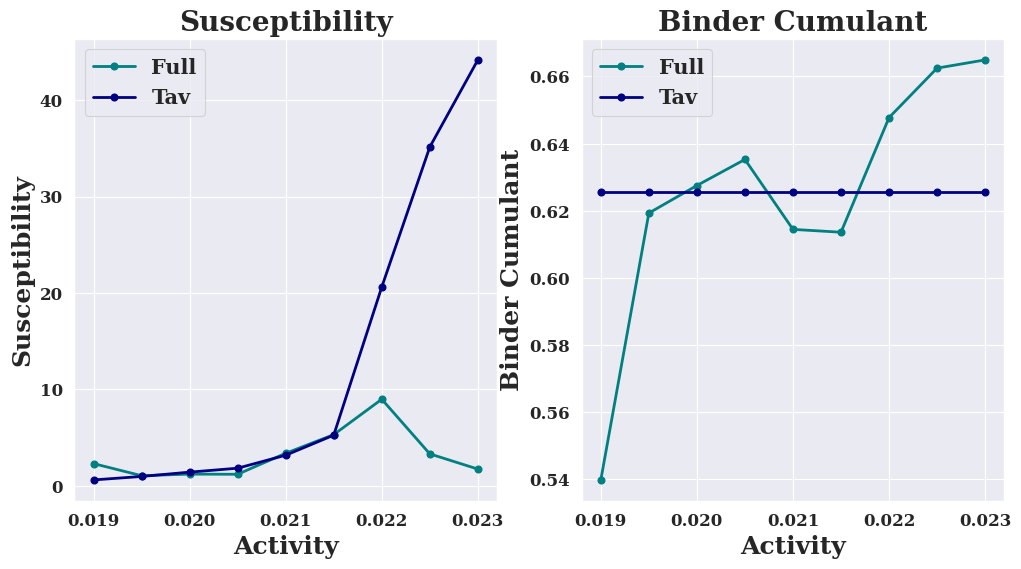

In [107]:
susfull, sus_tav, binder_full, binder_tav = comp_order(def_arr_normt, av_def, act_list, conv_list, LL)
fig, ax = plt.subplots(1, 2, figsize = (12, 6))
ax[0].plot(act_list, susfull, label = 'Full', marker = 'o')
ax[0].plot(act_list, sus_tav, label = 'Tav', marker = 'o')
ax[0].set_xlabel('Activity')
ax[0].set_ylabel('Susceptibility')
ax[0].set_title('Susceptibility')
ax[0].legend()

ax[1].plot(act_list, binder_full, label = 'Full', marker = 'o')
ax[1].plot(act_list, binder_tav, label = 'Tav', marker = 'o')
ax[1].set_xlabel('Activity')
ax[1].set_ylabel('Binder Cumulant')
ax[1].set_title('Binder Cumulant')
ax[1].legend()

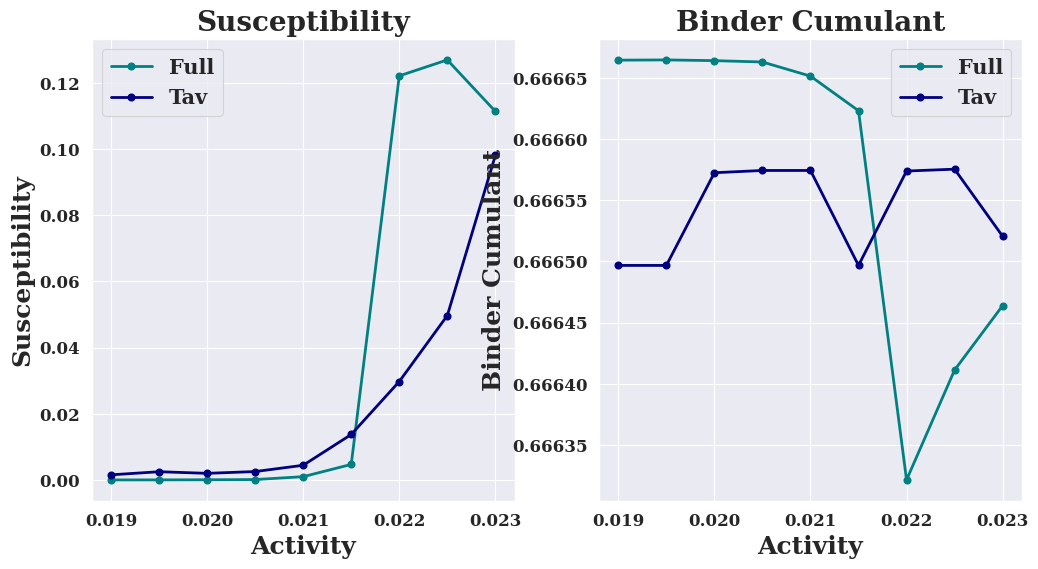

In [50]:
susfull, sus_tav, binder_full, binder_tav = comp_order(def_arr_rho, av_def, act_list, conv_list, LL)
fig, ax = plt.subplots(1, 2, figsize = (12, 6))
ax[0].plot(act_list, susfull, label = 'Full', marker = 'o')
ax[0].plot(act_list, sus_tav, label = 'Tav', marker = 'o')
ax[0].set_xlabel('Activity')
ax[0].set_ylabel('Susceptibility')
ax[0].set_title('Susceptibility')
ax[0].legend()

ax[1].plot(act_list, binder_full, label = 'Full', marker = 'o')
ax[1].plot(act_list, binder_tav, label = 'Tav', marker = 'o')
ax[1].set_xlabel('Activity')
ax[1].set_ylabel('Binder Cumulant')
ax[1].set_title('Binder Cumulant')
ax[1].legend()

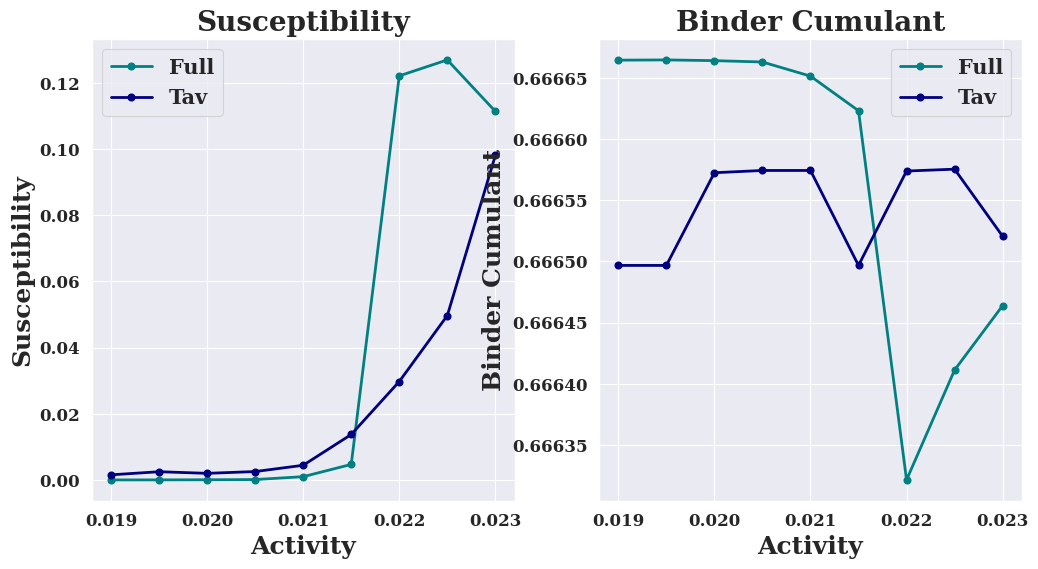

In [48]:
susfull, sus_tav, binder_full, binder_tav = comp_order(def_arr_n, av_def, act_list, conv_list, LL)
fig, ax = plt.subplots(1, 2, figsize = (12, 6))
ax[0].plot(act_list, susfull, label = 'Full', marker = 'o')
ax[0].plot(act_list, sus_tav, label = 'Tav', marker = 'o')
ax[0].set_xlabel('Activity')
ax[0].set_ylabel('Susceptibility')
ax[0].set_title('Susceptibility')
ax[0].legend()

ax[1].plot(act_list, binder_full, label = 'Full', marker = 'o')
ax[1].plot(act_list, binder_tav, label = 'Tav', marker = 'o')
ax[1].set_xlabel('Activity')
ax[1].set_ylabel('Binder Cumulant')
ax[1].set_title('Binder Cumulant')
ax[1].legend()

In [157]:
norm = LL**2
def_arr, _, dens_fluc_full, _ = ad.get_arrays_full(Ndataset = 2)
def_arr /= norm
av_def = ad.get_arrays_av(Ndataset = 2)[-1]  / norm

In [132]:
def_arr_shifted = np.nanmean((def_arr - av_def[:,0][None,:,None])**4, axis = -1) \
/ np.nanmean((def_arr - av_def[:,0][None,:,None])**2, axis = -1) ** 2
def_arr_non = np.nanmean((def_arr)**4, axis = -1) \
/ np.nanmean((def_arr)**2, axis = -1) ** 2
act_list = ad.act_list[2]
conv_list = ad.conv_list[2]

In [ ]:
for i, act in enumerate(act_list):
    plt.plot(np.arange(conv_list[i], def_arr_non.shape[0]), 1 - def_arr_non[conv_list[i]:,i]/3, label = f'{act}')
plt.legend(fontsize=12, ncol=3)

In [ ]:
for i, act in enumerate(act_list):
    plt.plot(np.arange(conv_list[i], def_arr_shifted.shape[0]), 1 - def_arr_shifted[conv_list[i]:,i]/3, label = f'{act}')
plt.legend(fontsize=12, ncol=3)

In [135]:
A = np.pi * 1.25 ** 2
LLX = 1024
def_arr_a = (2  * A * def_arr * norm - LLX ** 2) / (LLX ** 2)

In [136]:
def_arr_shifted = np.nanmean((def_arr - av_def[:,0][None,:,None])**4, axis = -1) \
/ np.nanmean((def_arr - av_def[:,0][None,:,None])**2, axis = -1) ** 2
def_arr_non = np.nanmean((def_arr)**4, axis = -1) \
/ np.nanmean((def_arr)**2, axis = -1) ** 2
def_arr_a_non = np.nanmean((def_arr_a )**4, axis = -1) \
/ np.nanmean((def_arr_a)**2, axis = -1) ** 2

In [137]:
sus = np.nanmean((def_arr - av_def[:,0][None,:,None])**2, axis = -1)
sus_tav = av_def[:,0] * norm * np.nanmean(sus, axis = 0)

sus2 = np.nanmean(def_arr ** 2, axis = -1) - np.nanmean(def_arr, axis = -1) ** 2
sus2_tav = av_def[:,0] * norm * np.nanmean(sus2, axis = 0)

In [138]:
sus_full = np.zeros((sus.shape[1], 2)) * np.nan
sus2_full = np.zeros((sus.shape[1], 2)) * np.nan

for i, act in enumerate(act_list):
    sus_full[i, 0] = np.nanmean((def_arr[conv_list[i]:, i, :] - av_def[i,0])**2) 
    sus2_full[i, 0] = np.nanmean(def_arr[conv_list[i]:, i, :] ** 2) - np.nanmean(def_arr[conv_list[i]:, i, :]) ** 2


sus_full[:, 0] *= av_def[:, 0] * norm
sus2_full[:, 0] *= av_def[:, 0] * norm

In [159]:
N = 2
susceptibility = np.zeros((len(ad.window_sizes[N]), ad.Nactivity[N], 2)) * np.nan

dens_fluc = dens_fluc_full * def_arr[:, None, :, :] ** 2
dens_fluc_av = np.nanmean(dens_fluc, axis = -1)
#dens_fluc_av = ad.get_arrays_av(Ndataset = N)[-3]

for i, act in enumerate(ad.act_list[N]):

    susceptibility[:, i, 0] = np.nanmean(dens_fluc_av[ad.conv_list[N][i]:, :, i], axis = 0)
    susceptibility[:, i, 1] = np.nanstd(dens_fluc_av[ad.conv_list[N][i]:, :, i], axis = 0) \
        / np.sqrt(ad.Nframes[N] - ad.conv_list[N][i])


susceptibility[:, :, 0] /= (av_def[:,0][None,:]) ** 2
susceptibility_wav = np.nanmean(susceptibility[:, :, 0], axis = 0)

susceptibility_wav *= av_def[:,0] * norm
#susceptibility[:, :, 0] *= av_defects[:, 0][None, :]
#susceptibility[:, :, 1] *= av_defects[:, 0][None, :]

In [91]:
Bref, sus_ref = ad.get_binder_susceptibility(Ndataset=2)
sus_ref = sus_ref / (norm * av_def[:, 0][None, :, None])
sus_ref_wav = np.nanmean(sus_ref, axis = 0) * (norm * av_def[:, 0][:, None])

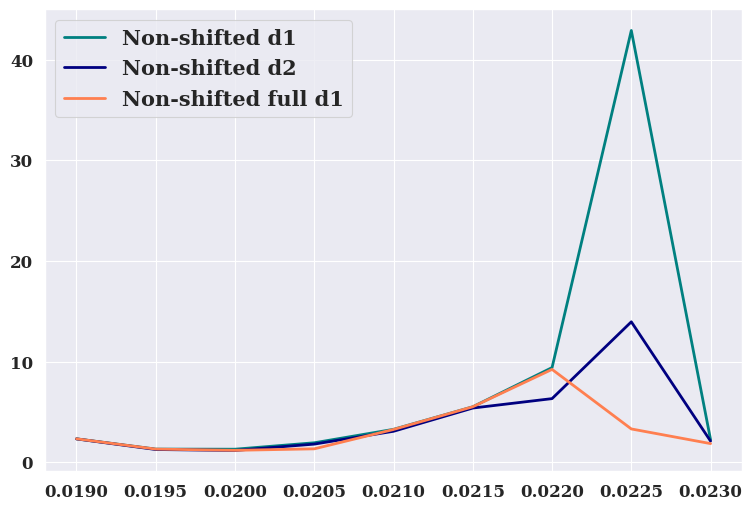

In [164]:
fig, ax = plt.subplots()
ax.plot(act_list, sus_tav / av_def[:, 0] **2, label = 'Non-shifted d1')
ax.plot(act_list, sus2_tav / av_def[:, 0] **2, label = 'Non-shifted d2')
ax.plot(act_list, sus_full[:, 0] / av_def[:, 0] **2, label = 'Non-shifted full d1')
ax.plot(act_list, sus2_full[:, 0] / av_def[:, 0] **2, label = 'Non-shifted full d2')
#ax.plot(act_list, sus_ref_wav[:,0], label = 'Ref')
#ax.plot(act_list, susceptibility_wav, label = 'Shifted')
ax.legend()

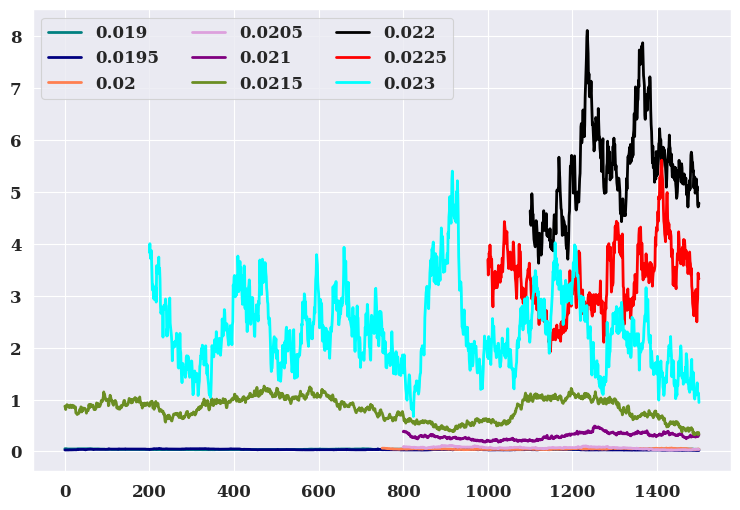

In [49]:
fig, ax = plt.subplots()
for i, act in enumerate(act_list):
    ax.plot(np.arange(conv_list[i], def_arr_a_non.shape[0]), sus[conv_list[i]:,i], label = f'{act}')
ax.legend(fontsize=12, ncol=3)

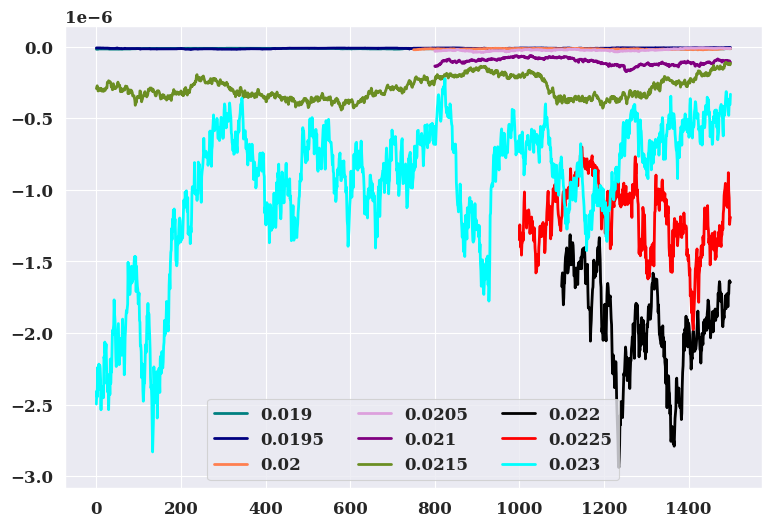

In [31]:
for i, act in enumerate(act_list):
    plt.plot(np.arange(conv_list[i], def_arr_a_non.shape[0]), 1 - def_arr_a_non[conv_list[i]:,i], label = f'{act}')
plt.legend(fontsize=12, ncol=3)

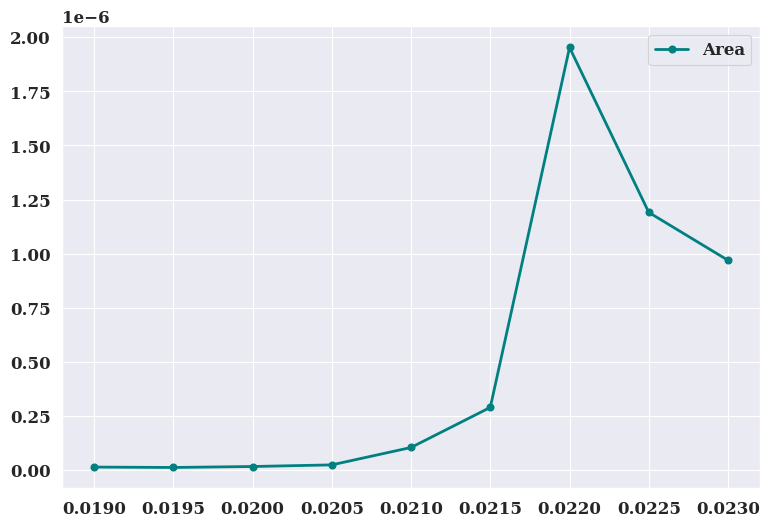

In [33]:
fig, ax = plt.subplots()
avs = []
avs_un = []
avs_a = []
for i, act in enumerate(act_list):
    avs.append(1 - np.nanmean(def_arr_shifted[conv_list[i]:,i]))
    avs_un.append(1 - np.nanmean( def_arr_non[conv_list[i]:,i]))
    avs_a.append(-1 + np.nanmean(def_arr_a_non[conv_list[i]:,i]))


#ax.plot(act_list, avs, 'o', label = 'Shifted')
#ax.plot(act_list, avs_un, 'o', label = 'Unshifted')
ax.plot(act_list,avs_a, 'o-', label = 'Area')
plt.legend(fontsize=12, ncol=3)
#ax.set_ylim(0.9995,1.0005)

(0.016, 0.04)

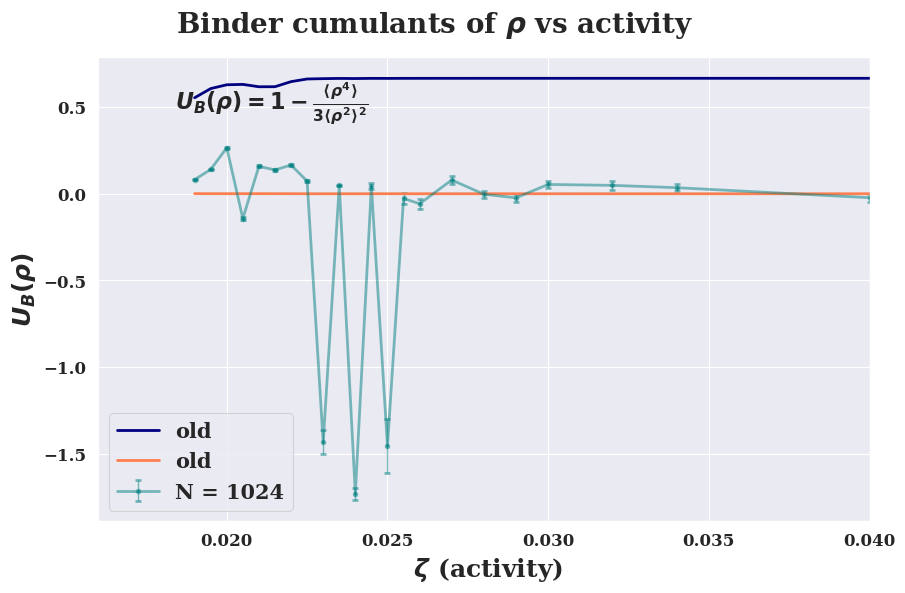

In [10]:
fig, ax = ad.plot_binder_cumulants(plot_binder = True, use_merged = True)
ax.plot(acts,Bs, label = 'old')
ax.legend()
ax.set_xlim(0.016,0.04)

In [8]:
Y = np.ones([2,3,4])
x = np.linspace(1,6,6).reshape(-1,2)
Y/x[:,0][None, :, None]

array([[[1.     , 1.     , 1.     , 1.     ],
        [0.33333, 0.33333, 0.33333, 0.33333],
        [0.2    , 0.2    , 0.2    , 0.2    ]],

       [[1.     , 1.     , 1.     , 1.     ],
        [0.33333, 0.33333, 0.33333, 0.33333],
        [0.2    , 0.2    , 0.2    , 0.2    ]]])

In [3]:
act_idx_bounds=[0,None]
use_merged = True
Npoints_to_fit = 5

In [ ]:
fig, ax = ad.plot_density_fluctuation_time_av(Ndataset = 0, \
                                    act_idx_bounds = [4,None], window_idx_bounds = [14, None], use_merged = True, save = True)

window_sizes = ad.window_sizes[0][14:]
min_val = 0.04
ax.plot(window_sizes, (min_val * window_sizes[0] ** 2) / window_sizes ** 2, '--', color='black', alpha=0.7, lw = 1.7)
ax.text(0.03, 0.45, r'$\sim R^{-2}$', fontsize=15, transform=ax.transAxes, verticalalignment='top', fontweight='normal')

ax.plot(window_sizes, 13000/ window_sizes ** 3, '--', color='black', alpha=0.7, lw = 1.7)
ax.text(0.15, 0.95, r'$\sim R^{-3}$', transform=ax.transAxes, fontsize=15, verticalalignment='top', fontweight='normal')

ax.set_ylim(bottom = 5e-4, top = .1)

output_path = f'data\\nematic_analysis{LL}_LL0.05\\merged_results'
#fig.savefig(os.path.join(output_path, f'figs\\dens_fluc_time_av.png'), dpi = 420, pad_inches=0.25)


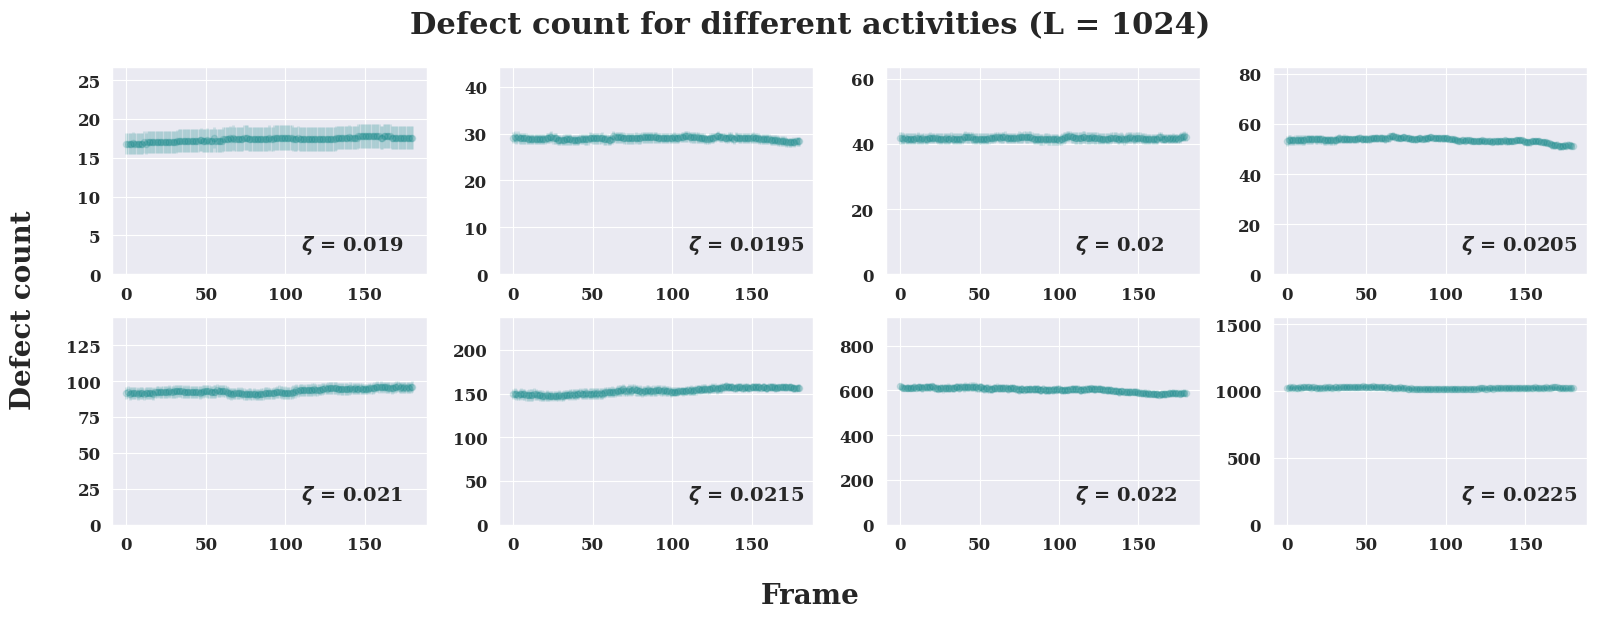

In [30]:
# check that conv_list is good for each dataset
act_min_idx = 0
fig, ax = ad.plot_defects_per_activity(Ndataset=0, act_min_idx = act_min_idx, act_max_idx = act_min_idx + 8, use_merged=use_merged, save=False)


Non-converged fits (p < 0.05):  0


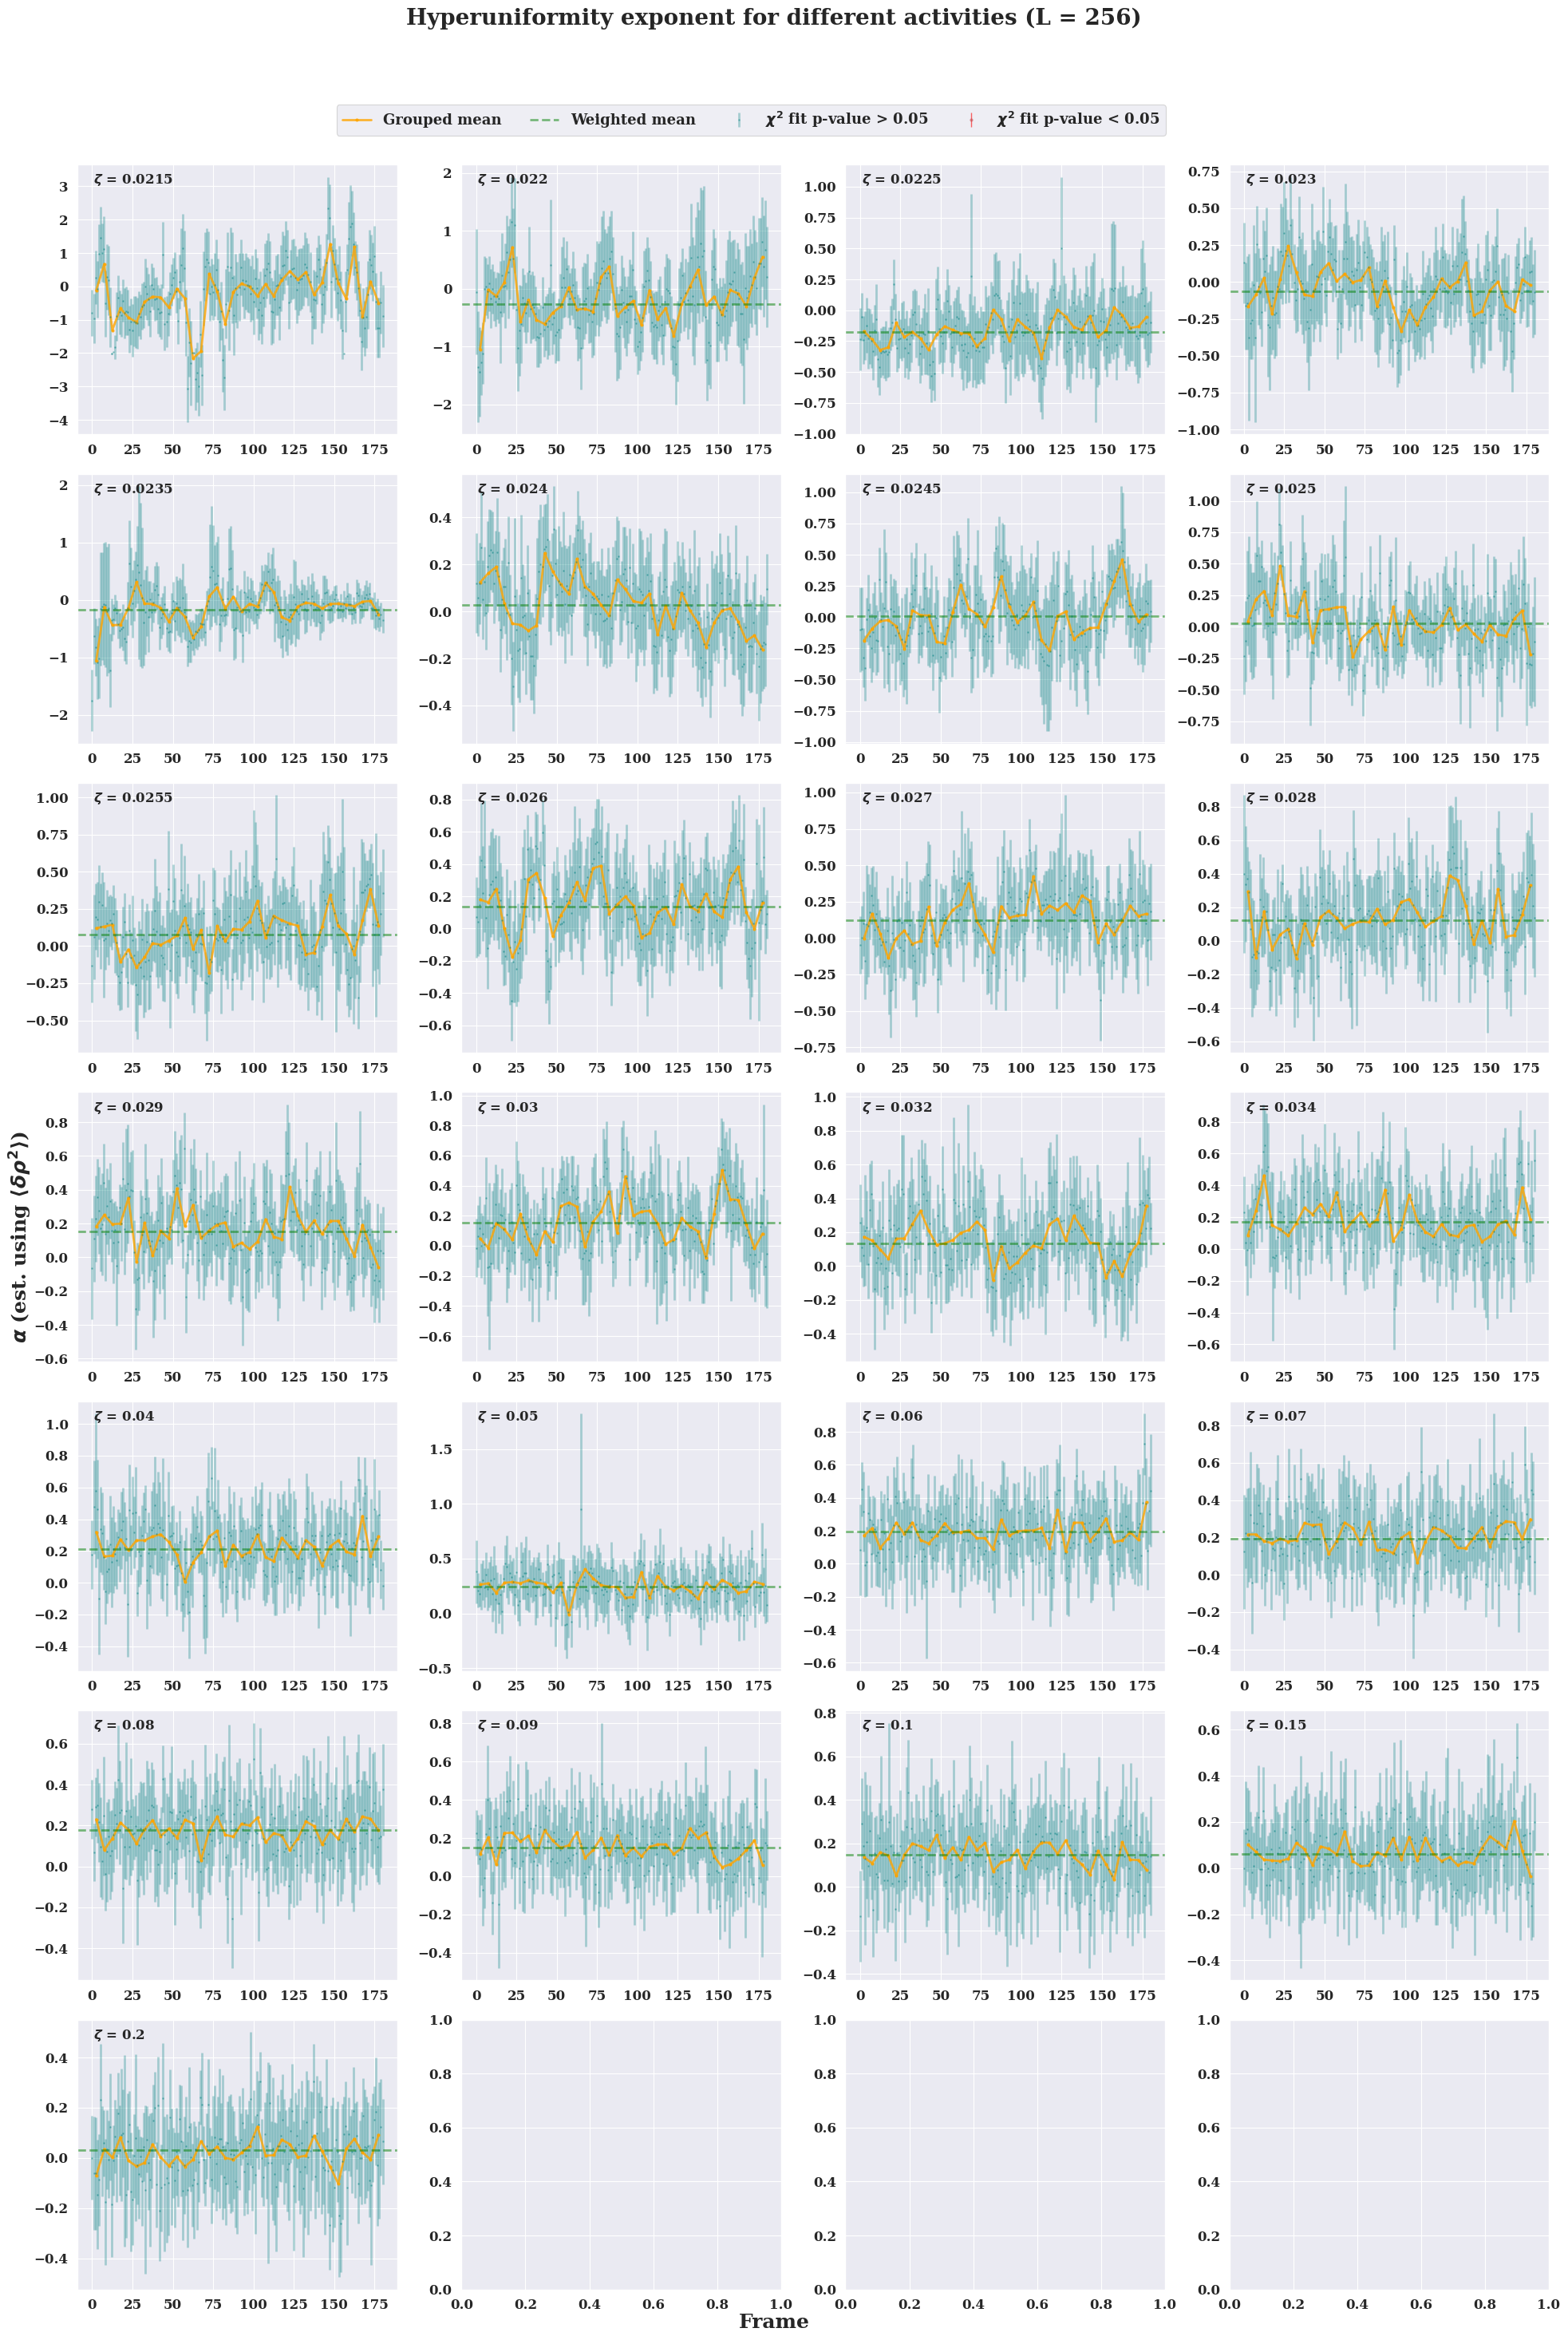

In [195]:
fitp_dens, statp_dens = ad.analyze_hyperuniformity(Ndataset = 3, fit_densities=True, save = True, \
                    weighted_mean = False, plot = True, use_merged = use_merged,\
                     act_idx_bounds=act_idx_bounds, window_idx_bounds=[30 - Npoints_to_fit, None]);


In [ ]:
#fig, ax = ad.plot_alpha_mean(Ndataset = 0, include=['fluc', 'sfac_time_av', 'sfac_time_av_unweighted'], use_merged = use_merged, save = True);
fig, ax = ad.plot_alpha_mean(Ndataset = 3, include=['fluc'],\
             use_merged = use_merged, save = False,);
ax.set_ylim(bottom = -.65, top=.38)
ax.set_xlim(left = 0.019, right=.03)
ax.legend(ncol=1, loc = 'lower right')
output_path = f'data\\nematic_analysis{LL}_LL0.05\\merged_results'
fig_name = 'alpha_mean_transition.png'
#fig.savefig(os.path.join(output_path, f'figs\\{fig_name}'), dpi = 420, pad_inches=0.25)

UnboundLocalError: local variable 'act_list_fluc' referenced before assignment

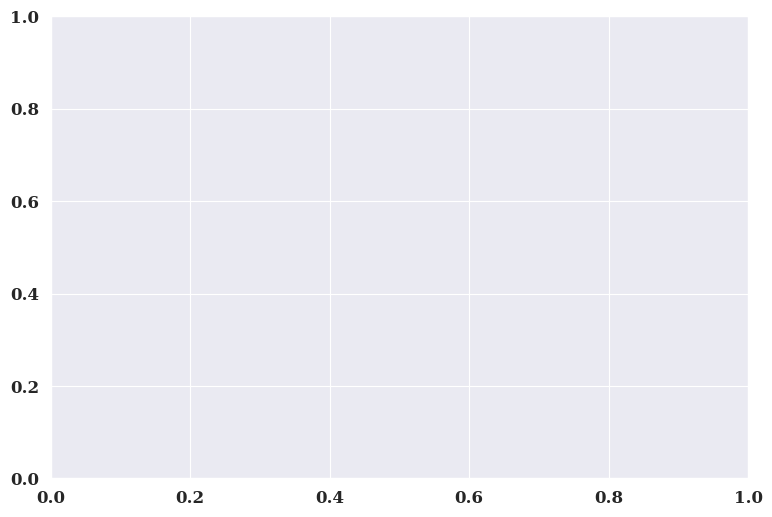

In [8]:
#fig, ax = ad.plot_alpha_mean(Ndataset = 0, include=['fluc', 'sfac_time_av', 'sfac_time_av_unweighted'], use_merged = use_merged, save = True);
fig, ax = ad.plot_alpha_mean(Ndataset = 0, include=['all'],\
             use_merged = use_merged, save = True,);
ax.set_ylim(bottom = -.65, top=.38)
ax.set_xlim(left = 0.019, right=.03)
ax.legend(ncol=1, loc = 'lower right')
output_path = f'data\\nematic_analysis{LL}_LL0.05\\merged_results'
fig_name = 'alpha_mean_transition.png'
#fig.savefig(os.path.join(output_path, f'figs\\{fig_name}'), dpi = 420, pad_inches=0.25)


In [ ]:
Nbounds = [3,7]

fitp = ad.analyze_sfac_time_av(Ndataset=3,Npoints_bounds = Nbounds, weighted = False, act_idx_bounds=act_idx_bounds, use_merged = use_merged,save = True, plot = False);
ad.analyze_sfac_time_av(Ndataset=3,Npoints_bounds = Nbounds, weighted = True, act_idx_bounds=act_idx_bounds, use_merged = use_merged, save = True, plot = False,);
#fitpp = ad.analyze_sfac2(Ndataset=0, Npoints_bounds = Nbounds, weighted = True, act_idx_bounds = act_idx_bounds, use_merged = use_merged, save = True, plot = False);
#ad.analyze_sfac2(Ndataset=0, Npoints_bounds = Nbounds, weighted = False, act_idx_bounds = act_idx_bounds, use_merged = use_merged, save = True, plot = False);
ad.plot_alpha_mean(Ndataset = 3, include=['fluc', 'sfac_time_av', 'sfac_time_av_unweighted'], use_merged = use_merged, save = True);

Non-converged fits (p < 0.01):  3086
Non-converged fits (p < 0.01):  212


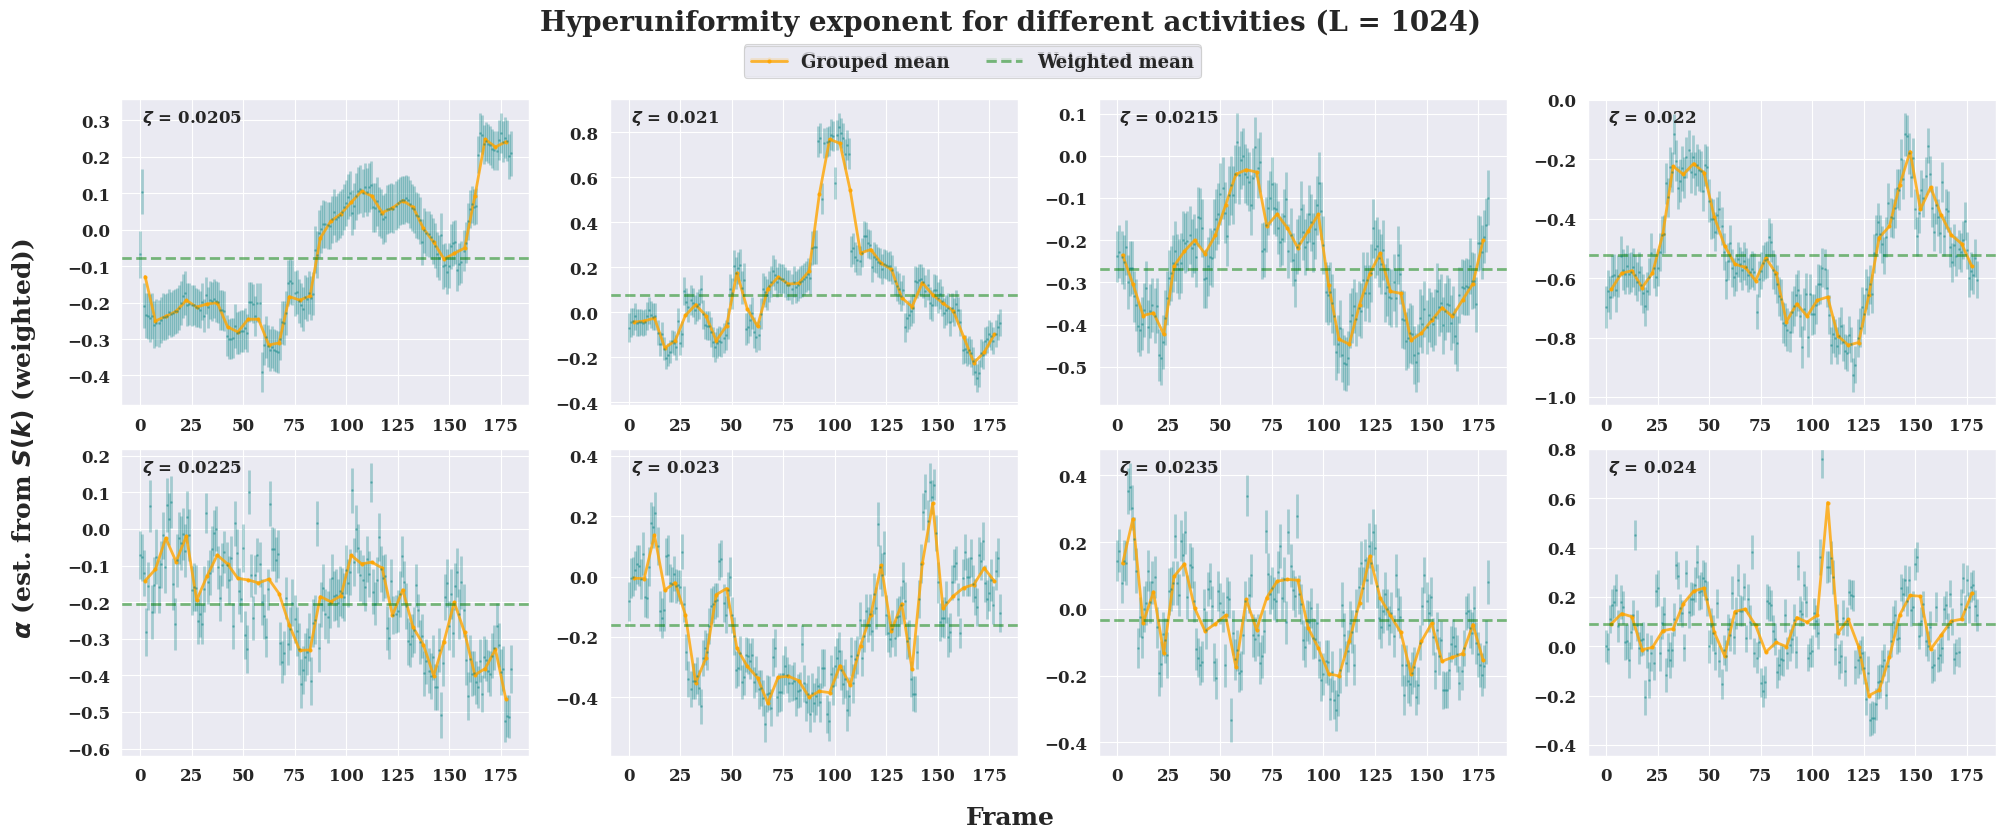

In [262]:
Npoints_to_fit = 5
act_idx_min = 3
fitpp = ad.analyze_sfac(Ndataset=0, Npoints_to_fit = Npoints_to_fit, weighted = True, act_idx_bounds = act_idx_bounds, use_merged = use_merged, save = True, plot = False);
ad.analyze_sfac(Ndataset=0, Npoints_to_fit = Npoints_to_fit, weighted = False, act_idx_bounds = act_idx_bounds, use_merged = use_merged, save = True, plot = False);
fig, ax = ad.plot_hyperuniformity_sfac(act_idx_bounds=[act_idx_min,act_idx_min + 8], use_merged = True, weighted = True, save = True)

output_path = f'data\\nematic_analysis{LL}_LL0.05\\merged_results'
fig_name = 'alpha_sfac.png'
fig.legend(ncol=4, fontsize = 13,bbox_to_anchor=(0.6, 1.00))
fig.supylabel(rf'$\alpha$ (est. from $S(k)$ (weighted))', x = 0.0)
fig.suptitle(f'Hyperuniformity exponent for different activities (L = {LL})', y=1.035)
fig.savefig(os.path.join(output_path, f'figs\\{fig_name}'), dpi = 420, pad_inches=0.1)
ax[-1].set_ylim(top = .8)
plt.show()

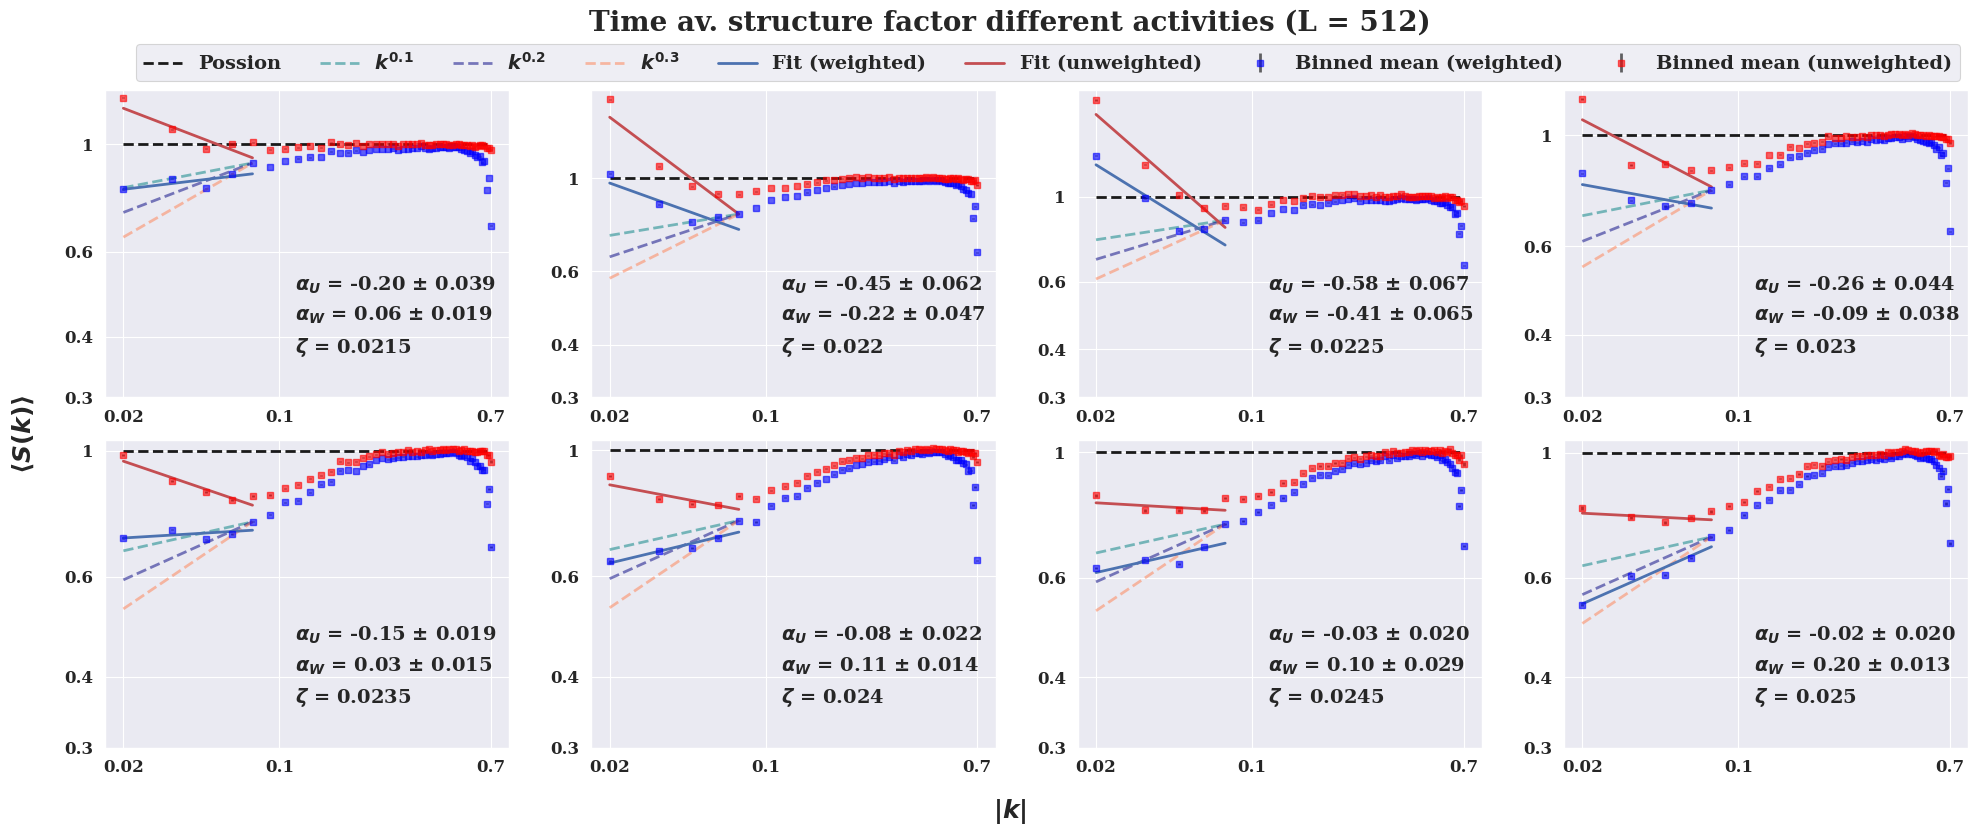

In [18]:
act_idx_min = 6
fig, ax = ad.plot_sfac_weighted_vs_unweighted(Npoints_to_fit=5, act_idx_bounds=[act_idx_min,act_idx_min+8], use_merged=use_merged, save = False)

(0.0, 2.0)

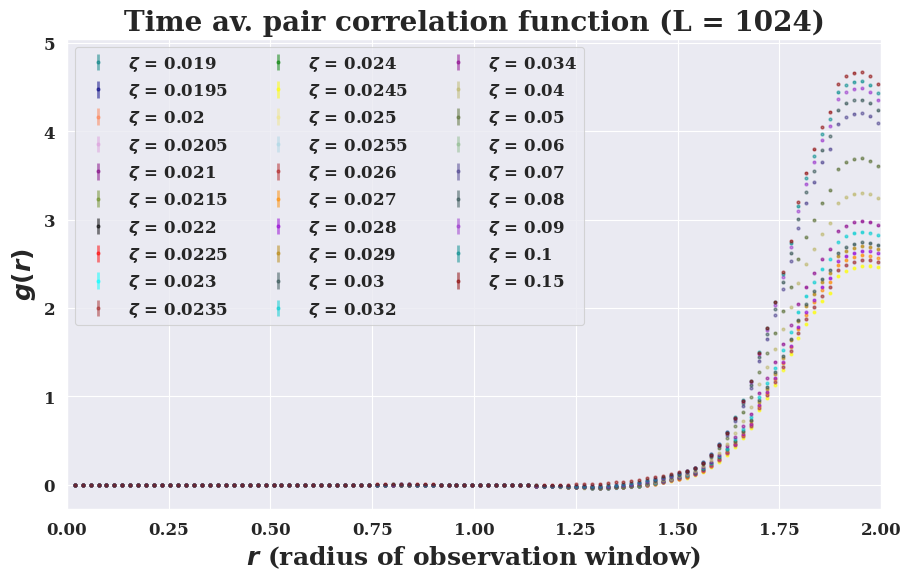

In [7]:
fig, ax = ad.plot_pair_corr_function_time_av(act_idx_bounds=[0,-1], use_merged=use_merged, save = True)
ax.legend(fontsize=12,ncol=3)
output_path = os.path.join(ad.output_main_path, 'merged_results')
#fig.savefig(os.path.join(output_path, f'figs\\pcf.png'), dpi = 420, pad_inches=0.25)
ax.set_xlim(left = 0, right = 2)

No. of windows with max susceptibility at activity 0.022: 22


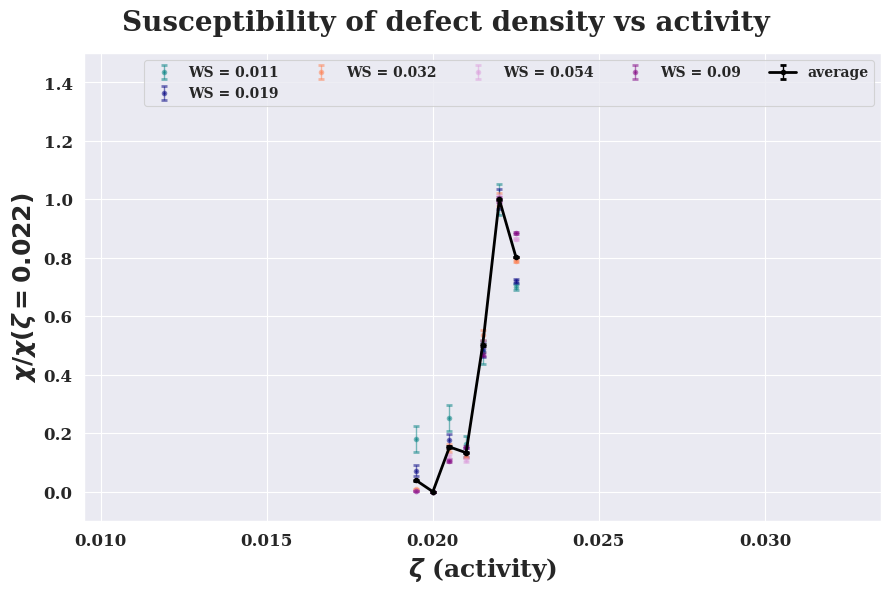

In [39]:
fig, ax = ad.plot_susceptibility(Ndataset=3,Nwindows_jump=5, act_max = 0.022, use_merged=use_merged, act_idx_bounds=[0,None], window_idx_bounds=[8,None])


(<Figure size 900x600 with 1 Axes>,
 <Axes: xlabel=' $\\zeta$ (activity)', ylabel='$U(\\rho)$'>)

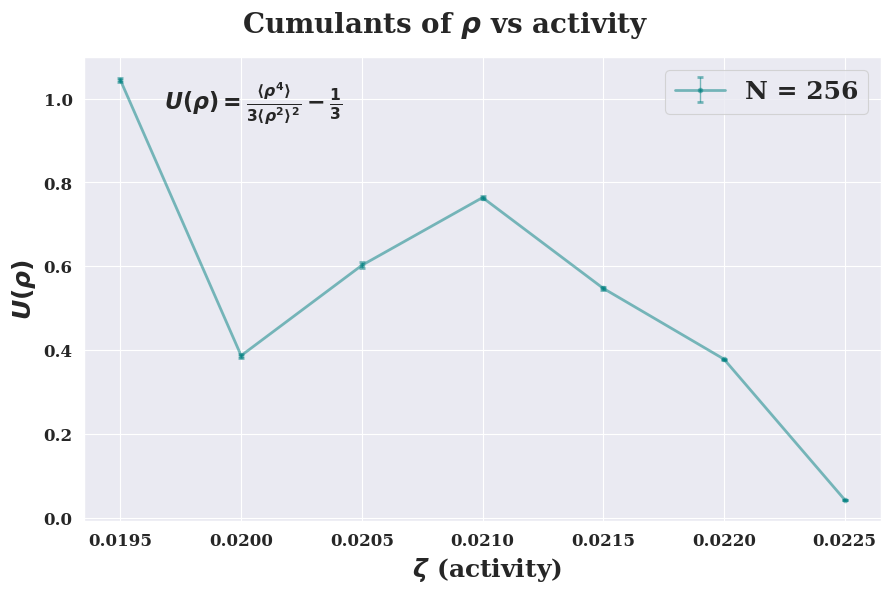

In [41]:
ad.plot_binder_cumulants(Ndataset=3, act_idx_bounds=[0,None], use_merged=use_merged,)

In [ ]:
fig, ax = plt.subplots(figsize=(9, 6))
minn = 0
maxx = None
window_idx_bounds_list=[[minn, maxx], [minn, 20], [minn, 15], [20, maxx], [20, None], [10, maxx], [10, 20], [10, 25], [15,25], [15, maxx]]
for window in window_idx_bounds_list:
    fitp, statp = ad.analyze_hyperuniformity(fit_densities=True, save = False, plot = False, act_bounds=[8,-2], use_merged = True, window_idx_bounds=window);
    ax.plot(ad.act_list[0][8:-2], np.nanmean(fitp[:,:,0], axis = 0), '.-', label = f'{window[0]}:{window[1]}')
ax.set_ylim([-0.3,0.4])
ax.legend()